In [1]:
import csv
import pandas as pd

In [2]:
# pega os dados_novembro_2023
dados_novembro_2023 = pd.read_csv('./data/dados_fipe_novembro-2023.csv', delimiter=',')

# pega os dados_janeiro_2024
dados_janeiro_2024 = pd.read_csv('./data/dados_fipe_janeiro-2024.csv', delimiter=',')

In [3]:
# cria vetor com os dados
dados = [dados_novembro_2023, dados_janeiro_2024]

In [4]:
for i in range(len(dados)):
    # separa ano_modelo em ano e combustivel
    dados[i][['ano', 'combustivel']] = dados[i]['ano_modelo'].str.split(' ', n=1, expand=True)

    # renomear a coluna preco_medio para preco
    dados[i] = dados[i].rename(columns={'preco_medio': 'preco'})

    # remove ano_modelo
    dados[i] = dados[i].drop(columns=['ano_modelo'])
    dados[i] = dados[i].drop(columns=['data_consulta'])

dados_novembro_2023, dados_janeiro_2024 = dados

In [5]:
dados_novembro_2023 = dados[0]
dados_janeiro_2024 = dados[1]

In [6]:
# pega quantos modelos cada marca tem
quantidade_modelos = dados_novembro_2023['marca'].value_counts()
print('top 10:\n', quantidade_modelos.head(10))

top 10:
 marca
VW - VolksWagen    2656
GM - Chevrolet     2505
Fiat               2402
Ford               2206
Mercedes-Benz      2007
Renault            1353
BMW                1237
Audi               1107
Toyota             1065
Peugeot            1004
Name: count, dtype: int64


In [7]:
dados[0].head(10)

,mes_referencia,codigo_fipe,marca,modelo,autenticacao,preco,ano,combustivel
0,novembro de 2023,038003-2,Acura,Integra GS 1.8,gp8v2xjgf6,11595.0,1992,Gasolina
1,novembro de 2023,038003-2,Acura,Integra GS 1.8,gd95n1p56r,10831.0,1991,Gasolina
2,novembro de 2023,038002-4,Acura,Legend 3.2/3.5,nb80n1zc51,26521.0,1998,Gasolina
3,novembro de 2023,038002-4,Acura,Legend 3.2/3.5,l7vhvmg4v3,23584.0,1997,Gasolina
4,novembro de 2023,038002-4,Acura,Legend 3.2/3.5,lqbcvxmftm,22175.0,1996,Gasolina
5,novembro de 2023,038002-4,Acura,Legend 3.2/3.5,kv0rgf39yg,19931.0,1995,Gasolina
6,novembro de 2023,038002-4,Acura,Legend 3.2/3.5,kj02hpdhjt,19079.0,1994,Gasolina
7,novembro de 2023,038002-4,Acura,Legend 3.2/3.5,jpf2yf1wly,16812.0,1993,Gasolina
8,novembro de 2023,038002-4,Acura,Legend 3.2/3.5,h5mdq3h42z,15462.0,1992,Gasolina
9,novembro de 2023,038002-4,Acura,Legend 3.2/3.5,hygpjktcdc,14852.0,1991,Gasolina


In [8]:
carros_mais_caros = dados[1].sort_values(by='preco', ascending=False)
print('Top 10 carros mais caros da FIPE em', dados[1]['mes_referencia'][0] + ':\n', carros_mais_caros[['marca', 'modelo', 'preco', 'ano']].head(10))

Top 10 carros mais caros da FIPE em janeiro de 2024:
              marca                                    modelo      preco   ano
21704  Rolls-Royce         Cullinan Black Badge 6.7 V12 Aut.  8100000.0  Zero
4538       Ferrari    SF 90 SPIDER 4.0 V8 Bi-Turbo (Híbrido)  7900000.0  Zero
14131  LAMBORGHINI                    AVENTADOR LP 770-4 SVJ  7798987.0  2022
14119  LAMBORGHINI          AVENTADOR 770-4 SVJ ROADSTER V12  7795266.0  2021
4539       Ferrari    SF 90 SPIDER 4.0 V8 Bi-Turbo (Híbrido)  7579763.0  2023
14132  LAMBORGHINI                    AVENTADOR LP 770-4 SVJ  7440356.0  2021
21705  Rolls-Royce         Cullinan Black Badge 6.7 V12 Aut.  7415452.0  2023
4540       Ferrari    SF 90 SPIDER 4.0 V8 Bi-Turbo (Híbrido)  7339766.0  2022
4541       Ferrari  SF 90 STRADALE 4.0 V8 Bi-Turbo (Híbrido)  7300000.0  Zero
14133  LAMBORGHINI                    AVENTADOR LP 770-4 SVJ  7217086.0  2020


In [9]:
# compare os preços dos carros em ambos os meses e mostre a variação percentual, imprimindo os 10 carros com maior variação percentual e os 10 com menor variação percentual

dados_novembro_2023['preco'] = dados_novembro_2023['preco'].astype(float)
dados_janeiro_2024['preco'] = dados_janeiro_2024['preco'].astype(float)

variacao = dados_novembro_2023.merge(dados_janeiro_2024, on=['marca', 'modelo', 'ano', 'combustivel'], suffixes=('_novembro_2023', '_janeiro_2024'))
variacao['variacao'] = ((variacao['preco_janeiro_2024'] - variacao['preco_novembro_2023']) / variacao['preco_novembro_2023']) * 100

print('Top 10 carros com maior variação percentual (valorizaram):\n', variacao.sort_values(by='variacao', ascending=False)[['marca', 'modelo','ano','variacao']].head(10).rename(columns={'variacao': 'variação em %'}))
print('Top 10 carros com menor variação percentual (desvalorizaram):\n', variacao.sort_values(by='variacao', ascending=True)[['marca', 'modelo','ano','variacao']].head(10).rename(columns={'variacao': 'variação em %'}))

Top 10 carros com maior variação percentual (valorizaram):
          marca                             modelo   ano  variação em %
14373     Lada                      Niva 1.7i 4x4  2000      42.388451
14374     Lada                      Niva 1.7i 4x4  1999      41.624622
14375     Lada                      Niva 1.7i 4x4  1998      39.180803
14376     Lada                      Niva 1.7i 4x4  1998      39.180803
20124  Porsche                911 GT3/ GT2 Street  2007      38.807481
20187  Porsche  911 Turbo Coupe 3.6/3.8 (991/992)  2008      35.609691
20186  Porsche  911 Turbo Coupe 3.6/3.8 (991/992)  2009      26.431786
20188  Porsche  911 Turbo Coupe 3.6/3.8 (991/992)  2007      26.295332
7875      Ford          F-250 XL 3.9 CD TB Diesel  2009      25.532486
14362     Lada          Niva 1.6 RC/ Pantanal 4x4  1996      25.148152
Top 10 carros com menor variação percentual (desvalorizaram):
                 marca                            modelo   ano  variação em %
19708         Peuge

In [10]:
# encontre o preço do carro "e-2008 5p Aut. ( Elétrico)" em ambos os meses nos datasets originais
carro = dados_novembro_2023[dados_novembro_2023['modelo'] == 'Niva 1.7i 4x4']
print('Preço do carro "Niva 1.7i 4x4" em novembro de 2023:', carro['preco'].values[0])

carro = dados_janeiro_2024[dados_janeiro_2024['modelo'] == 'Niva 1.7i 4x4']
print('Preço do carro "Niva 1.7i 4x4" em janeiro de 2024:', carro['preco'].values[0])

Preço do carro "Niva 1.7i 4x4" em novembro de 2023: 10668.0
Preço do carro "Niva 1.7i 4x4" em janeiro de 2024: 15190.0


In [11]:
# encontre o carro com maior preço em ambos os meses
carro_mais_caro_novembro_2023 = dados_novembro_2023.sort_values(by='preco', ascending=False).head(1)

print('Carro mais caro em novembro de 2023:', carro_mais_caro_novembro_2023[['marca', 'modelo', 'preco', 'ano']])

Carro mais caro em novembro de 2023:         marca                                  modelo      preco   ano
4492  Ferrari  SF 90 SPIDER 4.0 V8 Bi-Turbo (Híbrido)  7900000.0  Zero


In [12]:
# Encontre o carro com menor preço em ambos os meses
carro_mais_barato_novembro_2023 = dados_novembro_2023.sort_values(by='preco', ascending=True).head(1)

print('Carro mais barato em novembro de 2023:', carro_mais_barato_novembro_2023[['marca', 'modelo', 'preco', 'ano']])

carro_mais_barato_janeiro_2024 = dados_janeiro_2024.sort_values(by='preco', ascending=True).head(1)

print('Carro mais barato em janeiro de 2024:', carro_mais_barato_janeiro_2024[['marca', 'modelo', 'preco', 'ano']])

Carro mais barato em novembro de 2023:       marca     modelo   preco   ano
14750  Lada  Laika 1.5  1898.0  1991
Carro mais barato em janeiro de 2024:       marca     modelo   preco   ano
14086  Lada  Laika 1.5  1885.0  1991


In [13]:
# Configuração para exibir todas as colunas em uma linha
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
pd.set_option('display.width', 1000)  # Ajuste conforme necessário para a largura da tela

# Compare em ambos os meses e encontre a variação percentual do preço do carro em faixas de preço, por exemplo, 0-20k, 20k-50k, 50k-100k, 100k-200k, 200k-500k, 500k-1000k, 1000k+, e mostre os top 10 carros que mais valorizaram e os top 10 carros que mais desvalorizaram em cada faixa de preço

faixas = [0, 20000, 50000, 100000, 200000, 500000, 1000000]

for i in range(len(faixas) - 1):
    faixa_min = faixas[i]
    faixa_max = faixas[i + 1]

    selecao = (variacao['preco_novembro_2023'] >= faixa_min) & (variacao['preco_novembro_2023'] < faixa_max)
    variacao_faixa = variacao[selecao]

    print('Faixa de preço:', faixa_min, 'a', faixa_max)
    print('Top 10 carros que mais valorizaram:')
    print(variacao_faixa.sort_values(by='variacao', ascending=False)[['marca', 'modelo','ano','variacao', 'preco_novembro_2023']].head(10).rename(columns={'variacao': 'variação em %'}).reset_index(drop=True))
    print('Top 10 carros que mais desvalorizaram:')
    print(variacao_faixa.sort_values(by='variacao', ascending=True)[['marca', 'modelo','ano','variacao', 'preco_novembro_2023']].head(10).rename(columns={'variacao': 'variação em %'}).reset_index(drop=True))
    print('\n')


Faixa de preço: 0 a 20000
Top 10 carros que mais valorizaram:
            marca                       modelo   ano  variação em %  preco_novembro_2023
0            Lada                Niva 1.7i 4x4  2000      42.388451              10668.0
1            Lada                Niva 1.7i 4x4  1999      41.624622               9910.0
2            Lada                Niva 1.7i 4x4  1998      39.180803               9668.0
3            Lada                Niva 1.7i 4x4  1998      39.180803               9668.0
4            Lada    Niva 1.6 RC/ Pantanal 4x4  1996      25.148152              18562.0
5  GM - Chevrolet            S10 Blazer 4.3 V6  1999      25.019429              18014.0
6            Fiat  Marea Weekend SX 1.8 16V 4p  1999      22.084048               6996.0
7            Lada    Niva 1.6 RC/ Pantanal 4x4  1995      16.080402              18109.0
8            Lada    Niva 1.6 RC/ Pantanal 4x4  1995      16.080402              18109.0
9            Lada    Niva 1.6 RC/ Pantanal 4x4  

In [14]:
variacao

,mes_referencia_novembro_2023,codigo_fipe_novembro_2023,marca,modelo,autenticacao_novembro_2023,preco_novembro_2023,ano,combustivel,mes_referencia_janeiro_2024,codigo_fipe_janeiro_2024,autenticacao_janeiro_2024,preco_janeiro_2024,variacao
0,novembro de 2023,038003-2,Acura,Integra GS 1.8,gp8v2xjgf6,11595.0,1992,Gasolina,janeiro de 2024,038003-2,gpdl1jv8cd,11520.0,-0.646831
1,novembro de 2023,038003-2,Acura,Integra GS 1.8,gd95n1p56r,10831.0,1991,Gasolina,janeiro de 2024,038003-2,gdhqy4n7fr,10761.0,-0.646293
2,novembro de 2023,038003-2,Acura,Integra GS 1.8,gd95n1p56r,10831.0,1991,Gasolina,janeiro de 2024,038003-2,gdhqy4n7fr,10761.0,-0.646293
3,novembro de 2023,038003-2,Acura,Integra GS 1.8,gd95n1p56r,10831.0,1991,Gasolina,janeiro de 2024,038003-2,gdhqy4n7fr,10761.0,-0.646293
4,novembro de 2023,038002-4,Acura,Legend 3.2/3.5,nb80n1zc51,26521.0,1998,Gasolina,janeiro de 2024,038002-4,m88vyfdvtr,26350.0,-0.644772
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22662,novembro de 2023,028001-1,Suzuki,Samurai JX Canvas 1.3,r8kc08kk1fvt,36864.0,1995,Gasolina,janeiro de 2024,028001-1,shq52c872lvt,37477.0,1.662869
22663,novembro de 2023,028001-1,Suzuki,Samurai JX Canvas 1.3,rxz77cv228rl,35964.0,1994,Gasolina,janeiro de 2024,028001-1,rxtfzcjwjzrl,35948.0,-0.044489
22664,novembro de 2023,028001-1,Suzuki,Samurai JX Canvas 1.3,p87fpyhp4wnc,31634.0,1993,Gasolina,janeiro de 2024,028001-1,pwgmb30f3jnc,30545.0,-3.442499
22665,novembro de 2023,028001-1,Suzuki,Samurai JX Canvas 1.3,pqg4mbl1kpj4,30120.0,1992,Gasolina,janeiro de 2024,028001-1,plqt0vj8zcj4,29800.0,-1.062417


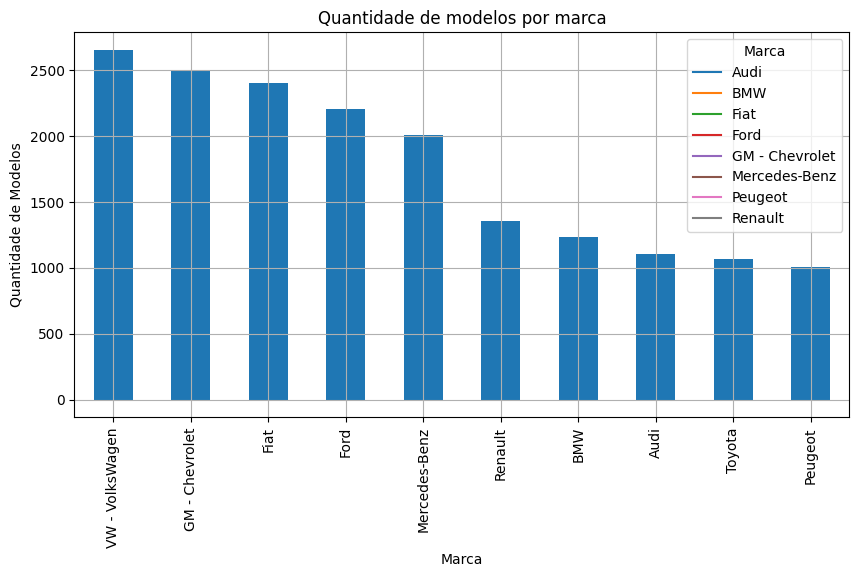

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura dos dados
dados_novembro_2023 = pd.read_csv('./data/dados_fipe_novembro-2023.csv', delimiter=',')
dados_janeiro_2024 = pd.read_csv('./data/dados_fipe_janeiro-2024.csv', delimiter=',')

dados = [dados_novembro_2023, dados_janeiro_2024]

# Processamento dos dados
for i in range(len(dados)):
    # separa ano_modelo em ano e combustivel
    dados[i][['ano', 'combustivel']] = dados[i]['ano_modelo'].str.split(' ', n=1, expand=True)

    # renomear a coluna preco_medio para preco
    dados[i] = dados[i].rename(columns={'preco_medio': 'preco'})

    # remove ano_modelo e data_consulta
    dados[i] = dados[i].drop(columns=['ano_modelo', 'data_consulta'])

dados_novembro_2023, dados_janeiro_2024 = dados

# pega quantos modelos cada marca tem
quantidade_modelos = dados_novembro_2023['marca'].value_counts()
top_marcas = quantidade_modelos.head(10).index

# Calcula a variação percentual dos preços
variacao = dados_novembro_2023.merge(dados_janeiro_2024, on=['marca', 'modelo', 'ano', 'combustivel'], suffixes=('_novembro_2023', '_janeiro_2024'))
variacao['variacao'] = ((variacao['preco_janeiro_2024'] - variacao['preco_novembro_2023']) / variacao['preco_novembro_2023']) * 100

# Filtra apenas as 10 marcas com mais modelos
variacao = variacao[variacao['marca'].isin(top_marcas)]

# Agrupa por mês de referência e marca e calcula a média da variação
variacao = variacao.groupby(['mes_referencia_novembro_2023', 'marca'])['variacao'].mean().reset_index()

# Cria a tabela pivot para plotar o gráfico
variacao_pivot = variacao.pivot(index='mes_referencia_novembro_2023', columns='marca', values='variacao')

# Plot do gráfico de linhas
variacao_pivot.plot(title='Variação percentual do preço médio das marcas ao longo dos meses', figsize=(10, 5))
plt.xlabel('Mês de Referência')
plt.ylabel('Variação Percentual (%)')
plt.legend(title='Marca')
plt.grid(True)

# Plot do gráfico de barras com a quantidade de modelos por marca
quantidade_modelos_top10 = quantidade_modelos.head(10)
quantidade_modelos_top10.plot(kind='bar', title='Quantidade de modelos por marca', figsize=(10, 5))
plt.xlabel('Marca')
plt.ylabel('Quantidade de Modelos')
plt.grid(True)
plt.show()
